In [6]:
# Import pandas
import pandas as pd

# Create the DB engine connector
db_cnx = sa.create_engine(f'mysql://{USERNAME}:{PASSWORD}@{HOST_AND_PORT}/{DB_NAME}')

# Read the Customer Table
db_query = '''
        SELECT *
        FROM customer
        '''
cust_df = pd.read_sql(db_query, db_cnx)import sqlalchemy as sa

In [76]:
from dotenv import load_dotenv
import os
from sqlalchemy import create_engine

# Load environment variables from the .env file
load_dotenv()

# Access environment variables
HOST_AND_PORT = os.getenv('DB_HOST_AND_PORT')
DB_NAME = os.getenv('DB_NAME')
USERNAME = os.getenv('DB_USERNAME')
PASSWORD = os.getenv('DB_PASSWORD')

# Construct the SQLAlchemy connection string
connection_string = f"mysql+mysqldb://{USERNAME}:{PASSWORD}@{HOST_AND_PORT}/{DB_NAME}"

# Create the SQLAlchemy engine
engine = create_engine(connection_string)

# Now you can use the 'engine' object to interact with the database
# For example, you can execute queries using engine.execute(...)

In [77]:
print(DB_NAME)

sakila


### QUESTION 1: Determine how much we made in revenue from active and inactive members. Visualize the result as a bar chart.

In [78]:
import pandas as pd

db_query   = '''
    WITH Total_revenue AS (
    SELECT t1.customer_id, t1.active, t2.amount
    FROM customer as t1
    JOIN payment as t2 
	ON t1.customer_id = t2.customer_id
) 
    SELECT  
    CASE
     WHEN active = 1 THEN 'Active'
     WHEN active = 0 THEN 'Inactive'
     ELSE 'Unknown'
     END AS status, 
    SUM(amount) AS revenue
FROM Total_revenue
GROUP BY active;    
'''

df_output = pd.read_sql(db_query, engine)

df_output

,status,revenue
0,Active,65746.60
1,Inactive,1659.96


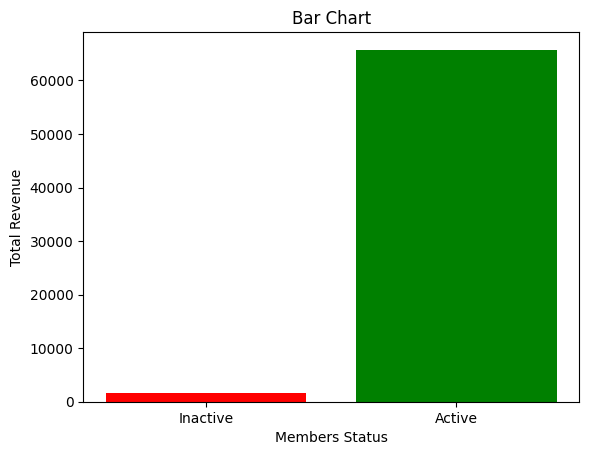

In [48]:
import matplotlib.pyplot as plt

category = [df_output['status'][1], df_output['status'][0]]
revenues = [df_output['revenue'][1], df_output['revenue'][0]]

#bar chart
plt.bar(category, revenues, color=['red', 'green'])

plt.xlabel('Members Status')
plt.ylabel('Total Revenue')

plt.title('Bar Chart')

plt.show()

### QUESTION 2: We have 2 staff members, Mike and Jon. Determine the staff member that contributed the most to our revenue in the month of August in 2005. Visualize their percentage contribution as a pie chart.

In [51]:
db_query   = '''
    SELECT s.staff_id, s.first_name, s.last_name, p.amount, p.payment_date 
    FROM staff as s
    INNER JOIN payment as p
    ON s.staff_id = p.staff_id
    WHERE (month(p.payment_date) = 8 AND year(p.payment_date) = 2005)    
'''

df_staff = pd.read_sql(db_query, engine)

df_staff

,staff_id,first_name,last_name,amount,payment_date
0,1,Mike,Hillyer,0.99,2005-08-02 18:01:38
1,1,Mike,Hillyer,0.99,2005-08-18 03:57:29
2,1,Mike,Hillyer,0.99,2005-08-21 23:33:57
3,1,Mike,Hillyer,1.99,2005-08-22 01:27:57
4,1,Mike,Hillyer,5.99,2005-08-22 20:03:46
...,...,...,...,...,...
5681,2,Jon,Stephens,2.99,2005-08-22 19:54:26
5682,2,Jon,Stephens,3.99,2005-08-17 00:05:05
5683,2,Jon,Stephens,8.99,2005-08-23 06:09:44
5684,2,Jon,Stephens,2.99,2005-08-23 11:08:46


In [52]:
df_staff.isna().sum()

staff_id        0
first_name      0
last_name       0
amount          0
payment_date    0
dtype: int64

In [59]:
revenue_by_staff = (df_staff
                    .groupby(by=['staff_id','first_name', 'last_name'])
                    .agg(revenue=pd.NamedAgg('amount', 'sum'))
                    .reset_index()
                    .set_index('staff_id')
                    .sort_values(by='revenue', ascending=False)  # Sort by revenue in descending order
                    )

revenue_by_staff

,first_name,last_name,revenue
staff_id,,,
2,Jon,Stephens,12216.49
1,Mike,Hillyer,11853.65


It can be observed that Jon Stephens generated the most revenue at 12,216.49, although Mike Hillyer came close at 11,853.65

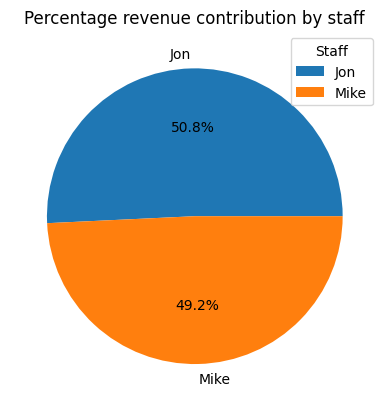

In [62]:
# Visualisation
plt.pie(revenue_by_staff['revenue'],        
        labels=revenue_by_staff['first_name'], 
        autopct='%.1f%%'
        )

plt.legend(title='Staff')

plt.title("Percentage revenue contribution by staff")

plt.show()

*It is evident that the staff member- Jon contributed the most revenue 50.8% in the month of August 2005*

### QUESTION 3: Create a simple line chart showing the monthly rental count of the store. Do you notice any patterns or trends?

In [107]:
db_query   = '''
    SELECT i.store_id, p.rental_id, p.amount, r.rental_date 
    FROM rental as r
        INNER JOIN inventory as i
        ON r.inventory_id = i.inventory_id
        INNER JOIN payment as p
        ON r.rental_id = p.rental_id;   
'''

df_output_2 = pd.read_sql(db_query, engine)

df_output_2

,store_id,rental_id,amount,rental_date
0,1,1,2.99,2005-05-24 22:53:30
1,2,2,2.99,2005-05-24 22:54:33
2,2,3,3.99,2005-05-24 23:03:39
3,1,4,4.99,2005-05-24 23:04:41
4,2,5,6.99,2005-05-24 23:05:21
...,...,...,...,...
16039,1,13486,0.99,2006-02-14 15:16:03
16040,2,15966,2.99,2006-02-14 15:16:03
16041,1,11676,0.00,2006-02-14 15:16:03
16042,2,14616,0.99,2006-02-14 15:16:03


In [108]:
df_output_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16044 entries, 0 to 16043
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   store_id     16044 non-null  int64         
 1   rental_id    16044 non-null  int64         
 2   amount       16044 non-null  float64       
 3   rental_date  16044 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 501.5 KB


In [104]:
# import calendar

# # # Convert month numbers to month names
# # df_output_2['rental_month'] = df_output_2['rental_month'].apply(lambda x: calendar.month_name[x])

# # Convert month numbers to month names
# # df_output_2['rental_date'] = df_output_2['rental_date'].apply(lambda x: x.to_period('M'))

# # Display the updated DataFrame
# df_output_2

In [109]:
rental_count = (df_output_2
                    .set_index('rental_date')
                    .sort_index(ascending=True)
                    .resample('M')
                    .size()
                    )
print(rental_count)

rental_date
2005-05-31    1156
2005-06-30    2311
2005-07-31    6709
2005-08-31    5686
2005-09-30       0
2005-10-31       0
2005-11-30       0
2005-12-31       0
2006-01-31       0
2006-02-28     182
Freq: M, dtype: int64


In [110]:
rental_count.index

DatetimeIndex(['2005-05-31', '2005-06-30', '2005-07-31', '2005-08-31',
               '2005-09-30', '2005-10-31', '2005-11-30', '2005-12-31',
               '2006-01-31', '2006-02-28'],
              dtype='datetime64[ns]', name='rental_date', freq='M')

In [111]:
# Convert month numbers to month names
rental_count.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 10 entries, 2005-05-31 to 2006-02-28
Freq: M
Series name: None
Non-Null Count  Dtype
--------------  -----
10 non-null     int64
dtypes: int64(1)
memory usage: 160.0 bytes


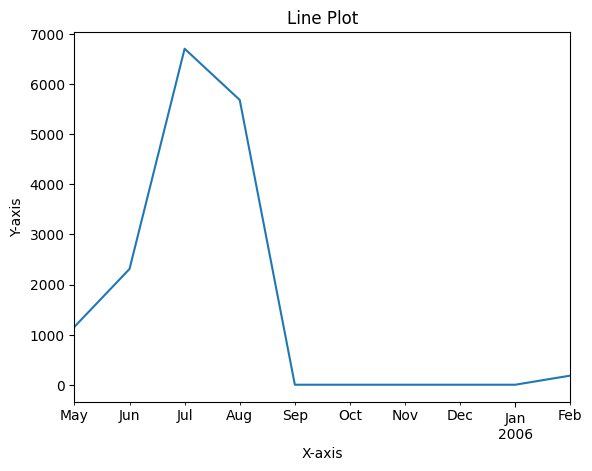

In [112]:
# plt.plot(rental_count.index, rental_count.values)

rental_count.plot()

plt.xlabel('X-axis')
plt.ylabel('Y-axis')

plt.title('Line Plot')

plt.show()

### QUESTION 4: Create a basic bar chart to show the monthly revenue for the rental store.

In [113]:
monthly_revenue = (df_output_2
                    .set_index('rental_date')
                    .sort_index(ascending=True)
                    .resample('M')
                    ['amount']
                    .sum()
                    )
print(monthly_revenue)

rental_date
2005-05-31     4823.44
2005-06-30     9629.89
2005-07-31    28368.91
2005-08-31    24070.14
2005-09-30        0.00
2005-10-31        0.00
2005-11-30        0.00
2005-12-31        0.00
2006-01-31        0.00
2006-02-28      514.18
Freq: M, Name: amount, dtype: float64


In [116]:
monthly_revenue.index = monthly_revenue.index.to_period('M')

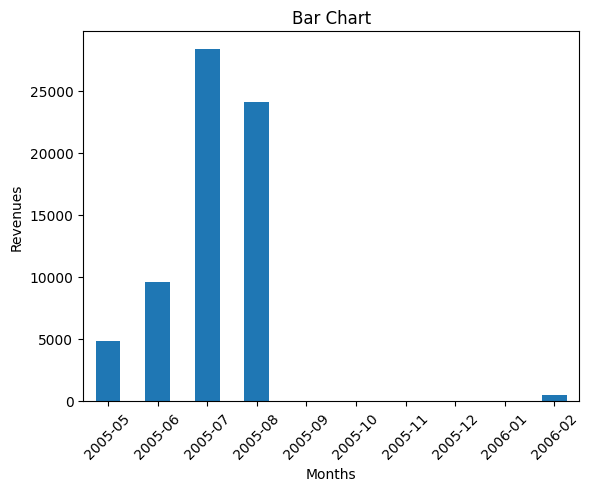

In [121]:
monthly_revenue.plot(kind='bar')


# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='center')

plt.xlabel('Months')
plt.ylabel('Revenues')

plt.title('Bar Chart')

plt.show()